# Twitter Dog Analysis 
                         
                         - By Abhik Sarkar

## Three Steps of Data Wrangling 
- Gathering Data
- Assessing data
- Cleaning data


Detect and document at least eight (8) quality issues and two (2) tidiness issues 

Key Points

Key points to keep in mind when data wrangling for this project:

   - You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
   
  
   -  Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
   
   
   - Cleaning includes merging individual pieces of data according to the rules of tidy data.
   
   
   - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs. 
   
   
   - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gathering the Data 

In [1]:
#necessary imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import csv
import sys
import os
import time
import requests


from tweepy import OAuthHandler


### First Part 
Loading the data from the csv file

In [2]:

df_tweet = pd.read_csv("twitter-archive-enhanced.csv")
df_tweet.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Second Part
Downloading the data from the internet and loading it using the pandas 

In [3]:
"""url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)"""

"url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'\nresponse = requests.get(url)\nwith open('image_predictions.tsv', 'wb') as file:\n    file.write(response.content)"

Opening the tsv file

In [4]:
#open tsv file
df_images = pd.read_table('image_predictions/image-predictions.tsv',sep='\t')

In [5]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Third Part
Additional Data via the Twitter API

In [6]:
"""
# authentication pieces
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

"""

'\n# authentication pieces\nconsumer_key = ""\nconsumer_secret = ""\naccess_token = ""\naccess_secret = ""\n\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth_handler=auth, \n                 wait_on_rate_limit=True, \n                 wait_on_rate_limit_notify=True)\n\n'

Twitter Query using tweet_id information from the df.

In [7]:
"""tweet_ids = list(df.tweet_id)

tweet_data = {}
for _id in tweet_ids:
    try:
        tweet_status = api.get_status(_id,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(_id)] = tweet_status._json
    except: 
        print("Error for: " + str(_id))"""

'tweet_ids = list(df.tweet_id)\n\ntweet_data = {}\nfor _id in tweet_ids:\n    try:\n        tweet_status = api.get_status(_id,\n                                      wait_on_rate_limit=True, \n                                      wait_on_rate_limit_notify=True)\n        tweet_data[str(_id)] = tweet_status._json\n    except: \n        print("Error for: " + str(_id))'

In [8]:
"""with open('tweet_json.txt', 'w') as file:
     file.write(json.dumps(tweet_data))"""

"with open('tweet_json.txt', 'w') as file:\n     file.write(json.dumps(tweet_data))"

In [9]:
tweet_json = open('tweet_json.txt', "r")
tweet_line =[]
tweets = tweet_json.read() 
for line in tweet_json:
    try:
        tweet = json.loads(line)
        tweet_line.append(tweet)
    except:
        continue
        
tweet_json.close()

 Converting the twitter api to pandas DataFrame to Combine with the Existing DataFrame 

In [10]:
obj = json.loads(tweets)

In [11]:
print(obj['892420643555336193'][ 'text'], obj['892420643555336193']['retweet_count'] ,obj['892420643555336193']['favorite_count'])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU 8315 38018


In [12]:
data = json.loads(tweets)
tweet_id,text,retweet_count,favorite_count = [],[],[],[]
for key in list(data.keys()):
    tweet_id.append(key)
    retweet_count.append(data[key]['retweet_count'])
    favorite_count.append(data[key]['favorite_count'])
df_api = pd.DataFrame([tweet_id,retweet_count,favorite_count]).T
df_api.columns = ["tweet_id","retweet_count","favorite_count"]
df_api.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8315,38018


 #### Complete API Data

In [13]:
data["892420643555336193"]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


## Assessing data 

#### df_tweet

In [14]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Description of the Above DataFrame
    tweet_id: the unique identifier for each tweet
    in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
    in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
    timestamp: time when this Tweet was created
    source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
    text: actual UTF-8 text of the status update
    retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
    retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
    retweeted_status_timestamp: time of retweet
    expanded_urls: tweet URL
    rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
    rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
    name: name of the dog
    doggo: one of the 4 dog "stage"
    floofer: one of the 4 dog "stage"
    pupper: one of the 4 dog "stage"
    puppo: one of the 4 dog "stage"


In [15]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Cleaning the data 



### Quality

    - Checking all the NaNs and Handling the NaNs.
    
    - We don't need to gather the tweets beyond August 1st, 2017. We can, but note that you won't be able to gather
      the image predictions for these tweets since you don't have access to the algorithm used. So removing all rows 
      before  Aug 1st, 2017
      
    - The tweet_ID is not the right data type and value in two DataFrames are of different types.
    
    - Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id.
    
    - We only want original ratings (no retweets).So the retweets shouldn't be there.
    
    - We only want ratings with images. Not all ratings have images.
    
    - Some ratings are inaccurately picked up.
    
    - Erroneous datatype for timestamp. Converting Object to DateTime Type.
    
    - Nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
    
    - Some predictions are not dogs, there is no column for the most possible breed of a dog.
    
### Tidyness
    
    -'doggo', 'floofer', 'pupper','puppo' can be combined in one column.
    
    - Combining Three DataFrames to one single DataFrame.
    
 


### Checking DataTypes

In [16]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df_tweet.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
len(df_tweet)

2356

#### df_images

In [19]:
df_images.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Description of the Above DataFrame

    tweet_id: the unique identifier for each tweet
    jpg_url: dog's image URL
    img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
    p1: algorithm's #1 prediction for the image in the tweet
    p1_conf: how confident the algorithm is in its #1 prediction
    p1_dog: whether or not the #1 prediction is a breed of dog
    p2: algorithm's #2 prediction for the image in the tweet
    p2_conf: how confident the algorithm is in its #2 prediction
    p2_dog: whether or not the #2 prediction is a breed of dog
    p3: algorithm's #3 prediction for the image in the tweet
    p3_conf: how confident the algorithm is in its #3 prediction
    p3_dog: whether or not the #3 prediction is a breed of dog


In [20]:
len(df_images)

2075

#### df_api

In [21]:
df_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [22]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null object
retweet_count     2340 non-null object
favorite_count    2340 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


## Description of the Above DataFrame

df_api columns:

    id: the unique identifier for each tweet
    retweet_count: number of times this Tweet has been retweeted
    favorite_count: indicates approximately how many times this Tweet has been liked by Twitter users
    

In [23]:
len(df_api)

2340

### Converting Object Type to Timestamp Datatype

In [24]:
# timestamp 
df_tweet["timestamp"] = pd.to_datetime(df_tweet["timestamp"])
df_tweet["retweeted_status_timestamp"]=  pd.to_datetime(df_tweet["retweeted_status_timestamp"])


### Checking Tweets Beyond 1st Aug 2017

In [25]:
df_tweet[df_tweet["timestamp"] > '2017-08-02 00:00:00 +0000']
# No Tweet is beyond 1st Aug 2017

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Inaccurate Ratings

In [26]:
df_tweet.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_numerator == 0, 'text']]

text
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag          NaN
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX    NaN
Name: text, dtype: object

In [28]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_numerator == 3, 'text']]

text
This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M    NaN
This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl            NaN
What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz       NaN
This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu          NaN
This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7     NaN
Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx     NaN
This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be ra

In [29]:
df_tweet.rating_denominator.value_counts()
# Mostly it's out of 10. There are few different ones as well.

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [30]:
df_tweet.loc[df_tweet.rating_denominator == 11, 'text']

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object

In [31]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 11, 'text']]

text
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…    NaN
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ    NaN
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5     NaN
Name: text, dtype: object

In [32]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 50, 'text']]

text
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                 NaN
From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK    NaN
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                    NaN
Name: text, dtype: object

In [33]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 80, 'text']]

text
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12    NaN
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw     NaN
Name: text, dtype: object

In [34]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 20, 'text']]

text
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                            NaN
Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating    NaN
Name: text, dtype: object

In [35]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 2, 'text']]

text
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv    NaN
Name: text, dtype: object

In [36]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 16, 'text']]

text
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible    NaN
Name: text, dtype: object

In [37]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 40, 'text']]

text
Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ    NaN
Name: text, dtype: object

In [38]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 70, 'text']]

text
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd    NaN
Name: text, dtype: object

In [39]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 15, 'text']]

text
@docmisterio account started on 11/15/15    NaN
Name: text, dtype: object

In [40]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator == 90, 'text']]

text
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1    NaN
Name: text, dtype: object

In [41]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==110   , 'text']]

text
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55    NaN
Name: text, dtype: object

In [42]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==120   , 'text']]

text
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq    NaN
Name: text, dtype: object

In [43]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==130   , 'text']]

text
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3    NaN
Name: text, dtype: object

In [44]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==150   , 'text']]

text
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE    NaN
Name: text, dtype: object

In [45]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==170   , 'text']]

text
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv    NaN
Name: text, dtype: object

In [46]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==7   , 'text']]

text
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx    NaN
Name: text, dtype: object

In [47]:
df_tweet['text'][df_tweet.loc[df_tweet.rating_denominator ==0   , 'text']]

text
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho    NaN
Name: text, dtype: object

### Converting Float Type to Integer Datatype
As NaN can't be accomodated in Interger type so we first fill NaNs with Pandas and then converting it to integer from float.

In [48]:
df_tweet["retweeted_status_user_id"].fillna(0,inplace= True)
df_tweet["retweeted_status_id"].fillna(0,inplace= True)
df_tweet["in_reply_to_status_id"].fillna(0,inplace= True)
df_tweet["in_reply_to_user_id"].fillna(0,inplace= True)

In [49]:
df_tweet["retweeted_status_user_id"] = df_tweet.retweeted_status_user_id.astype(np.uint64)
df_tweet["retweeted_status_id"] = df_tweet.retweeted_status_id.astype(np.uint64)
df_tweet["in_reply_to_status_id"] = df_tweet.in_reply_to_status_id.astype(np.uint64)
df_tweet["in_reply_to_user_id"] = df_tweet.in_reply_to_user_id.astype(np.uint64)

### Converting Object Type to Integer Datatype`

In [50]:
df_api["tweet_id"] = df_api.tweet_id.astype(np.uint64)
df_api["retweet_count"] = df_api.retweet_count.astype(np.uint64)
df_api["favorite_count"] = df_api.favorite_count.astype(np.uint64)

### Checking duplicates 

In [51]:
df_tweet["tweet_id"].duplicated().sum()

0

In [52]:
df_images["tweet_id"].duplicated().sum()

0

In [53]:
df_api["tweet_id"].duplicated().sum()

0

### Removing all the Retweets

In [54]:
df_tweet[df_tweet.retweeted_status_id !=0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,0,0,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,887473957103951872,4196983835,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,0,0,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592,19607400,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,0,0,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,830583320585068544,4196983835,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,0,0,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,878057613040115712,4196983835,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,0,0,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478336,4196983835,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,0,0,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,669000397445533696,4196983835,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,0,0,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,876850772322988032,512804507,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,0,0,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,866334964761202688,4196983835,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,0,0,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,868880397819494400,4196983835,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,0,0,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,873213775632977920,4196983835,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [55]:
df_tweet = df_tweet[~(df_tweet.retweeted_status_id !=0)]

In [56]:
df_tweet.drop(["retweeted_status_user_id","retweeted_status_timestamp","retweeted_status_id"],axis=1,inplace=True)

### Removing Predictions Which are not Dog

In [57]:
df_images = df_images[df_images.p1_dog]

### 'name', 'doggo', 'floofer', 'pupper','puppo'.

In [58]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [59]:
df_tweet['doggo'].replace('None', '', inplace=True)
df_tweet['floofer'].replace('None', '', inplace=True)
df_tweet['pupper'].replace('None', '', inplace=True)
df_tweet['puppo'].replace('None', '', inplace=True)

In [60]:
df_tweet['dog_size'] = df_tweet['doggo'].map(str) + df_tweet['floofer'].map(str) + df_tweet['pupper'].map(str) + df_tweet['puppo'].map(str)

In [61]:
df_tweet['dog_size'].head()

0    
1    
2    
3    
4    
Name: dog_size, dtype: object

In [62]:
df_tweet.dog_size.replace('', np.nan, inplace=True)

In [63]:
df_tweet.dog_size.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

##### There are some rows where it is true for both doggo puppo, doggo floofer and doggo and pupper.

For simplicity we will take the smaller size and wont' take two types of sizes.

In [64]:
df_tweet.dog_size.replace('doggopuppo', 'puppo', inplace=True)
df_tweet.dog_size.replace('doggofloofer', 'floofer', inplace=True)
df_tweet.dog_size.replace('doggopupper', 'pupper', inplace=True)

In [65]:
df_tweet.dog_size.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

###### Dropping all the unnecessary columns 

In [66]:
df_tweet.drop(['floofer','doggo','pupper','puppo'],axis=1, inplace=True)

In [84]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


Now only 4 sizes of dogs are available.

### Combining 3 Dataframes to one single DataFrame and saving it as csv

In [68]:
df_comb = pd.merge(df_images,df_tweet,on="tweet_id")

In [69]:
df_comb = pd.merge(df_comb,df_api,on="tweet_id")

In [87]:
pd.set_option("display.max_columns", len(df_comb.columns))
df_comb.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,retweet_count,favorite_count,score
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0,0,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,47,126,0.7
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0,0,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,43,123,0.9
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0,0,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,139,292,0.6
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0,0,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,41,106,0.5
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,0,0,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,59,130,1.0


In [85]:
df_comb["timestamp"] = pd.to_datetime(df_comb["timestamp"])

In [86]:
df_comb.to_csv("twitter_archive_master.csv")

# Inference

### Top 20 Breeds for Prediction

In [72]:
df_sum_prob =df_images.groupby(['p1']).sum()["p1_conf"] + df_images.groupby(['p2']).sum()["p2_conf"]+ df_images.groupby(['p3']).sum()["p3_conf"]
df_sum_prob.to_frame()
df_sum_prob = df_sum_prob.reset_index()
df_sum_prob.columns = ['breed', 'total']
df_sum_prob.head(1)

,breed,total
0,Afghan_hound,2.605499


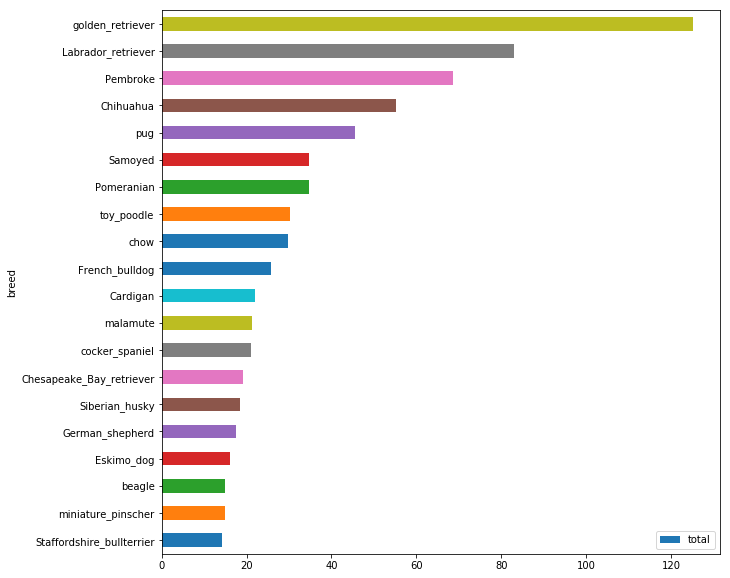

In [73]:
df_sum_prob = df_sum_prob.dropna()
df_sum_prob = df_sum_prob.sort_values(by='total')[-20:]
df_sum_prob.plot(x= 'breed',y='total',figsize=(10,10),kind ='barh');

### Scatter Plot for Average Retweet 

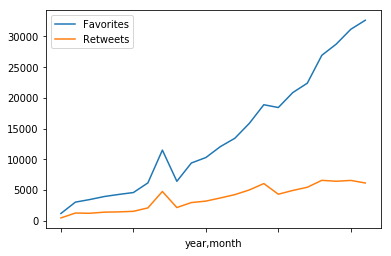

In [75]:
df_comb.favorite_count.groupby([df_comb["timestamp"].dt.year.rename('year'), df_comb["timestamp"].dt.month.rename('month')]).mean().plot('line');
df_comb.retweet_count.groupby([df_comb["timestamp"].dt.year.rename('year'), df_comb["timestamp"].dt.month.rename('month')]).mean().plot('line')
plt.legend(('Favorites','Retweets'));

In [76]:
common_dog_breeds = df_comb[["p1","timestamp"]].groupby(df_comb.p1).count().sort_values("timestamp").tail(85).index.tolist()

In [77]:
df_comb = df_comb[df_comb.p1.isin(common_dog_breeds)]

In [78]:
df_comb["score"] =  df_comb.rating_numerator/df_comb.rating_denominator

### Which dogs get the most love 

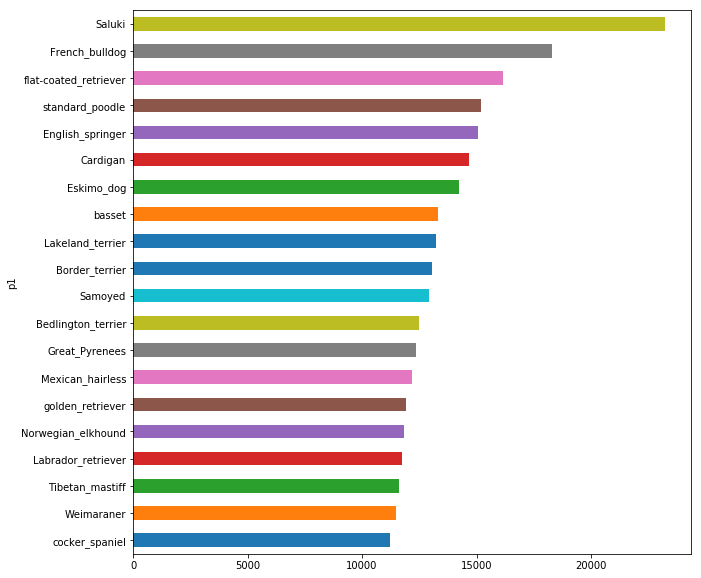

In [79]:
df_comb.groupby(df_comb.p1).mean().sort_values("favorite_count")["favorite_count"][-20:].plot(figsize=(10,10),kind='barh');

### Which dogs are popular

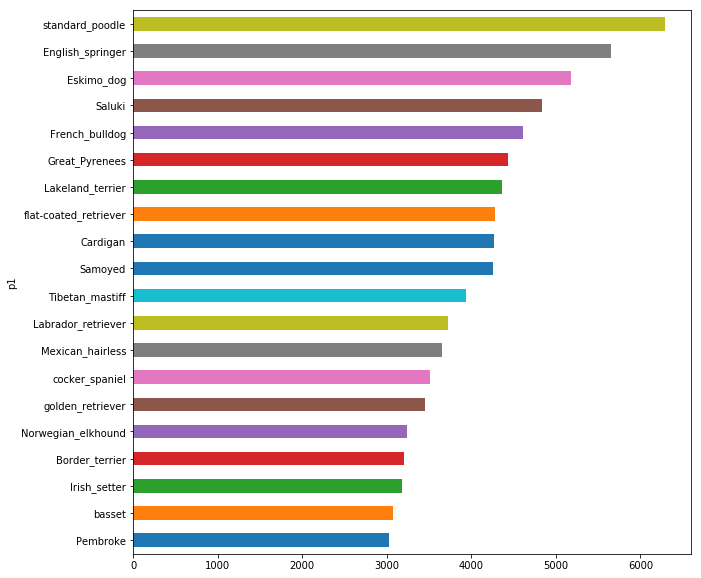

In [80]:
df_comb.groupby(df_comb.p1).mean().sort_values("retweet_count")["retweet_count"][-20:].plot(figsize=(10,10),kind='barh');

## High Rated Dogs 

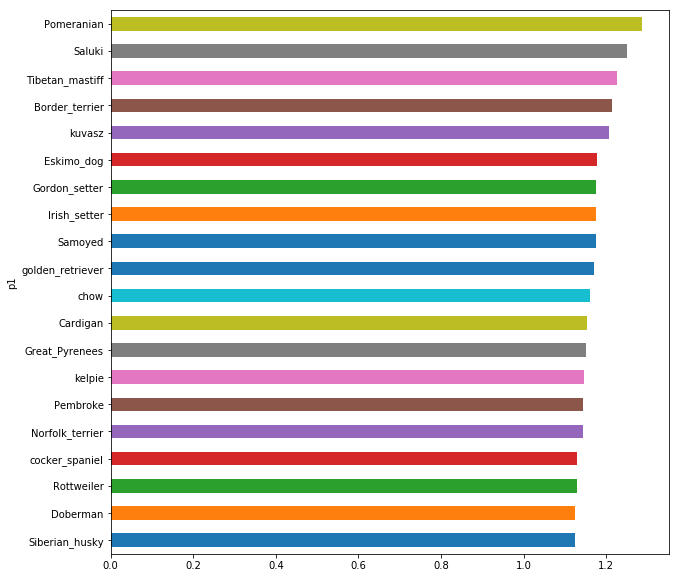

In [81]:
df_comb.groupby(df_comb.p1).mean().sort_values("score")["score"][-20:].plot(figsize=(10,10),kind='barh');